In [1]:
# load packages
import numpy as np
import pandas as pd
# import napari
import tifffile as tf
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

# import custum colormaps
from colormaps import *

# import custum functions
from STP_plotting import *
from STP_processing import *

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2

In [2]:
# choose based on run in acadia or home computer
# home_dir = "/mnt/labNAS/"
home_dir = "/Volumes/Data/"

metadata = pd.read_csv("stp_metadata.csv")

in_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/input_tifs/"
out_path = home_dir+"Emily/figures/fig_1_stp/python_figs/"

# add paths to metadata
# output of mean_subtract_individuals.py
for i in range(metadata.shape[0]):
    b_path = in_path+"norm_subtracted/p05_mean_subtracted/"+metadata.loc[i, 'brain']+"_p05_NO_subtracted.tif"

    metadata.loc[i,"p05_path"] = b_path

# area list from make_masks.py
areas = ["grey", "CTX", "OMCi", "OMCc", "ACAi", "ACAc", "aud","TH", "STR", "CP", "AMY", "P", "PG", "MB", "PAG", "SCm", 
         "SNr", "HY", "CNU", "TEa", "ECT", "VISC", "AI", "GU", "BS", "HIP"]


In [6]:
# load masks for each individually aligned brain
from time import time
start = time()
# make dictionary where keys = areas, values=list of masks corresponding to metadata order
mask_dict = {}
for area in areas:
    area_masks = []
    print("working on", area)
    for i in range(metadata.shape[0]):
        print("\t", metadata.loc[i,"brain"])
        save_folder = in_path+"masks/"+metadata.loc[i,"brain"]+"_masks/"
        with open(save_folder+metadata.loc[i,"brain"]+"_"+area+".npy", "rb") as f:
            area_masks.append(np.load(f))
        
    mask_dict[area] = area_masks

# for area in mask_dict:
#     print(area, ": \t", len(mask_dict[area]))

end = time()
print("took", end-start, "seconds to load")

working on grey
	 ACC_MMus_230403_b1
	 ACC_MMus_230404_b2
	 ACC_MMus_230427_b3
	 ACC_STeg_230308_b1
	 ACC_STeg_230322_b2
	 ACC_STeg_230501_b3
	 OMC_MMus_220119_b0
	 OMC_MMus_220303_b1
	 OMC_MMus_220324_b2
	 OMC_STeg_220208_b0
	 OMC_STeg_220411_b1
	 OMC_STeg_220429_b2
working on CTX
	 ACC_MMus_230403_b1
	 ACC_MMus_230404_b2
	 ACC_MMus_230427_b3
	 ACC_STeg_230308_b1
	 ACC_STeg_230322_b2
	 ACC_STeg_230501_b3
	 OMC_MMus_220119_b0
	 OMC_MMus_220303_b1
	 OMC_MMus_220324_b2
	 OMC_STeg_220208_b0
	 OMC_STeg_220411_b1
	 OMC_STeg_220429_b2
working on OMCi
	 ACC_MMus_230403_b1
	 ACC_MMus_230404_b2
	 ACC_MMus_230427_b3
	 ACC_STeg_230308_b1
	 ACC_STeg_230322_b2
	 ACC_STeg_230501_b3
	 OMC_MMus_220119_b0
	 OMC_MMus_220303_b1
	 OMC_MMus_220324_b2
	 OMC_STeg_220208_b0
	 OMC_STeg_220411_b1
	 OMC_STeg_220429_b2
working on OMCc
	 ACC_MMus_230403_b1
	 ACC_MMus_230404_b2
	 ACC_MMus_230427_b3
	 ACC_STeg_230308_b1
	 ACC_STeg_230322_b2
	 ACC_STeg_230501_b3
	 OMC_MMus_220119_b0
	 OMC_MMus_220303_b1
	 OMC_MMus_22

In [3]:
# import images
# import images
p05_path = in_path+"norm_subtracted/p05_mean_subtracted/"
p05_images = []
for i in range(metadata.shape[0]):
    print("loading:", metadata.loc[i, "brain"])
    p05_images.append(tf.imread(p05_path+metadata.loc[i,'brain']+"_p05_NO_subtracted.tif"))


loading: ACC_MMus_230403_b1
loading: ACC_MMus_230404_b2
loading: ACC_MMus_230427_b3
loading: ACC_STeg_230308_b1
loading: ACC_STeg_230322_b2
loading: ACC_STeg_230501_b3
loading: OMC_MMus_220119_b0
loading: OMC_MMus_220303_b1
loading: OMC_MMus_220324_b2
loading: OMC_STeg_220208_b0
loading: OMC_STeg_220411_b1
loading: OMC_STeg_220429_b2


In [4]:
# set areas to focus on
areas_plot = ["OMCc", "ACAc", "aud", "CP", "AMY", "TH", "HY", 
              "SNr", "SCm", "PG", "PAG", "BS"]

In [7]:
all_fluor = calc_fluor_individ(p05_images, metadata, mask_dict, 
                               areas_to_plot=areas_plot)

all_fluor

,area,Fluorescence,Volume_mm3,brain,species,inj_site
0,OMCc,309.84705,11617.98,ACC_MMus_230403_b1,MMus,ACC
1,ACAc,1085.89226,2857.06,ACC_MMus_230403_b1,MMus,ACC
2,aud,66.86299,6602.36,ACC_MMus_230403_b1,MMus,ACC
3,CP,3110.44317,25513.74,ACC_MMus_230403_b1,MMus,ACC
4,AMY,46.32795,4212.38,ACC_MMus_230403_b1,MMus,ACC
...,...,...,...,...,...,...
139,SNr,307.80698,1055.94,OMC_STeg_220429_b2,STeg,OMC
140,SCm,1292.25799,5598.34,OMC_STeg_220429_b2,STeg,OMC
141,PG,290.36116,631.90,OMC_STeg_220429_b2,STeg,OMC
142,PAG,807.49084,3869.04,OMC_STeg_220429_b2,STeg,OMC


# MMus vs. STeg
- trying to make the point that there's little to no difference
- fail to verify qualittative difference in proj pattern

## OMC

### Scatter and Volcano

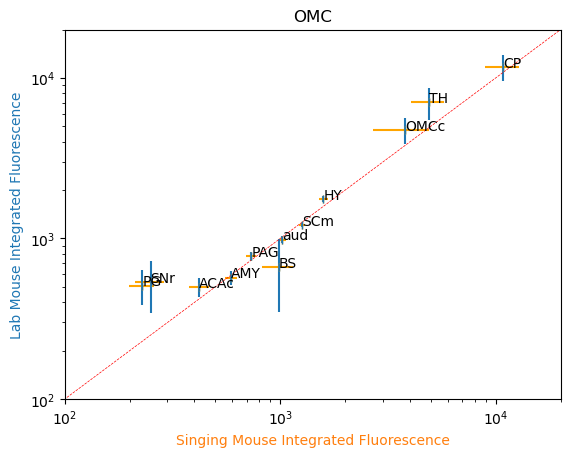

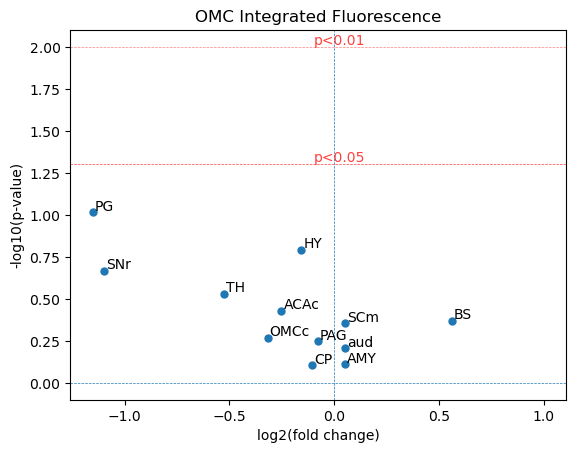

In [8]:
# scatterplot
omc_fluor = all_fluor[all_fluor["inj_site"]=="OMC"]

stvmm_area_scatter(omc_fluor, title="OMC", ax_limits=(100,20000))
plt.show()

#  Volcano plot
omc_ttest = df_ttest(omc_fluor)
volcano_plot(omc_ttest, title="OMC Integrated Fluorescence")
plt.show()

In [ ]:
omc_fluor

,area,Fluorescence,Volume_mm3,brain,species,inj_site
72,OMCc,6412.84380,10997.38,OMC_MMus_220119_b0,MMus,OMC
73,ACAc,435.94604,2635.56,OMC_MMus_220119_b0,MMus,OMC
74,aud,956.64824,5689.82,OMC_MMus_220119_b0,MMus,OMC
75,CP,15781.77724,25723.74,OMC_MMus_220119_b0,MMus,OMC
76,AMY,482.82159,3555.58,OMC_MMus_220119_b0,MMus,OMC
...,...,...,...,...,...,...
139,SNr,307.80698,1055.94,OMC_STeg_220429_b2,STeg,OMC
140,SCm,1292.25799,5598.34,OMC_STeg_220429_b2,STeg,OMC
141,PG,290.36116,631.90,OMC_STeg_220429_b2,STeg,OMC
142,PAG,807.49084,3869.04,OMC_STeg_220429_b2,STeg,OMC


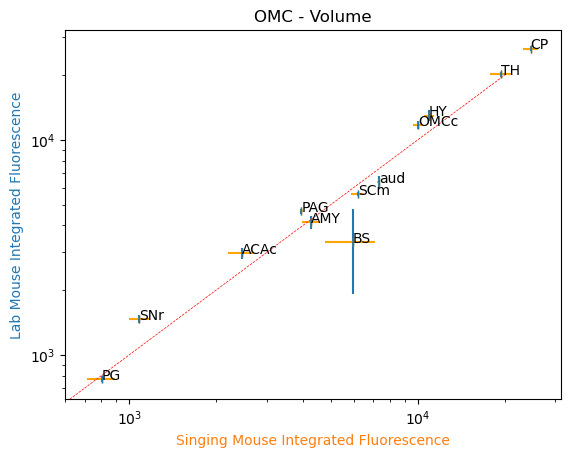

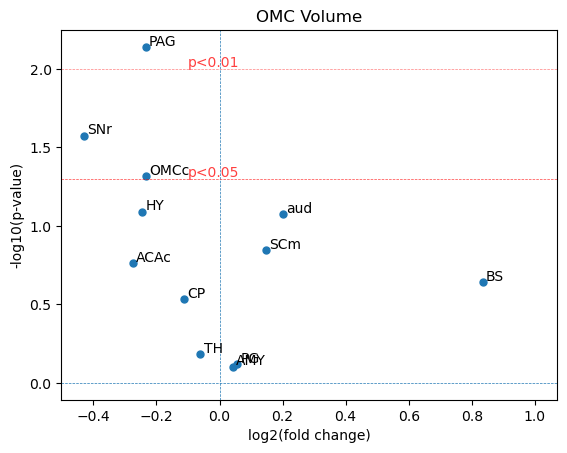

In [ ]:
# Volume
# scatterplot
omc_fluor = all_fluor[all_fluor["inj_site"]=="OMC"]

stvmm_area_scatter(omc_fluor, title="OMC - Volume", to_plot="Volume_mm3")
plt.show()

#  Volcano plot
omc_ttest = df_ttest(omc_fluor, test_vals="Volume_mm3")
volcano_plot(omc_ttest, title="OMC Volume")
plt.show()

/var/folders/l2/gvq0gkm95b1fbrlls4tsq2wr0000gp/T/ipykernel_60921/414522852.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omc_fluor["Fluor/Vol"] = omc_fluor["Fluorescence"]/omc_fluor["Volume_mm3"]


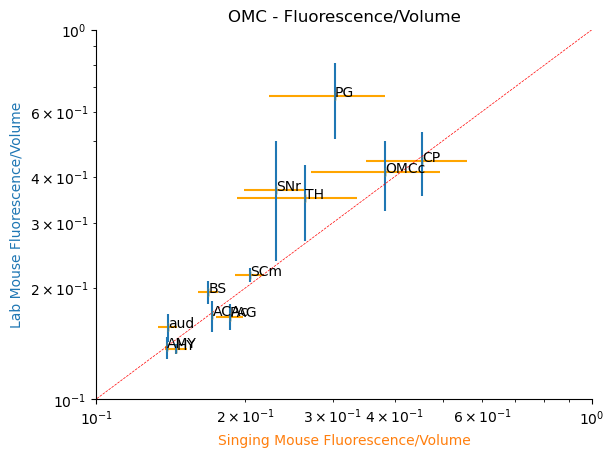

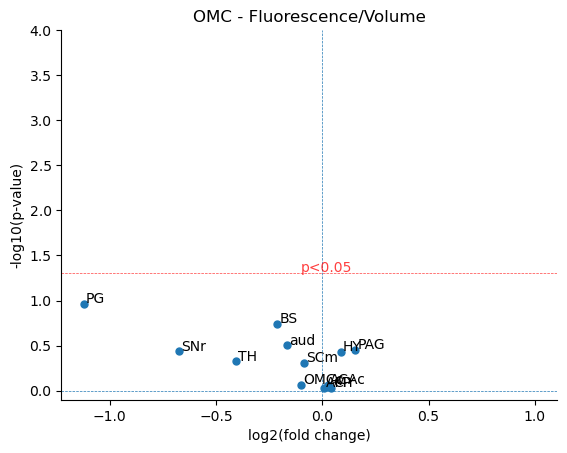

In [12]:
# flourescence/volume

# scatterplot
omc_fluor = all_fluor[all_fluor["inj_site"]=="OMC"]
omc_fluor["Fluor/Vol"] = omc_fluor["Fluorescence"]/omc_fluor["Volume_mm3"]

stvmm_area_scatter(omc_fluor, title="OMC - Fluorescence/Volume", to_plot="Fluor/Vol",
                   ax_limits=(0.1,1), xlabel="Singing Mouse Fluorescence/Volume",
                   ylabel="Lab Mouse Fluorescence/Volume")
ax = plt.gca()
# Remove all spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig(out_path+"omc_fl_vol_stp_scatter.svg", dpi=300, bbox_inches="tight")
plt.show()

#  Volcano plot
omc_ttest = df_ttest(omc_fluor, test_vals="Fluor/Vol")
volcano_plot(omc_ttest, title="OMC - Fluorescence/Volume", p_01=False, ylim=(0,2))
ax = plt.gca()
# Remove all spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig(out_path+"omc_fl_vol_stp_volcano.svg", dpi=300, bbox_inches="tight")
plt.show()

In [3]:
omc_fluor = pd.read_csv(in_path+"OMC_fl_vol.csv")
omc_fluor

,area,Fluorescence,Volume_mm3,brain,species,inj_site,Fluor/Vol
0,OMCc,6412.84380,10997.38,OMC_MMus_220119_b0,MMus,OMC,0.583125
1,aud,956.64824,5689.82,OMC_MMus_220119_b0,MMus,OMC,0.168133
2,CP,15781.77724,25723.74,OMC_MMus_220119_b0,MMus,OMC,0.613510
3,AMY,482.82159,3555.58,OMC_MMus_220119_b0,MMus,OMC,0.135793
4,TH,10105.07269,19758.36,OMC_MMus_220119_b0,MMus,OMC,0.511433
...,...,...,...,...,...,...,...
61,SNr,307.80698,1055.94,OMC_STeg_220429_b2,STeg,OMC,0.291500
62,SCm,1292.25799,5598.34,OMC_STeg_220429_b2,STeg,OMC,0.230829
63,PG,290.36116,631.90,OMC_STeg_220429_b2,STeg,OMC,0.459505
64,PAG,807.49084,3869.04,OMC_STeg_220429_b2,STeg,OMC,0.208706


### dot plots

/var/folders/l2/gvq0gkm95b1fbrlls4tsq2wr0000gp/T/ipykernel_6686/1967535601.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omc_fluor["Fluor/Vol"] = omc_fluor["Fluorescence"]/omc_fluor["Volume_mm3"]
/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an

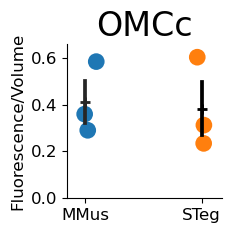

/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


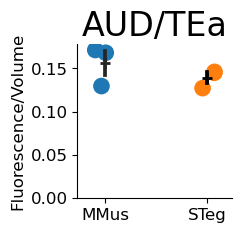

/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


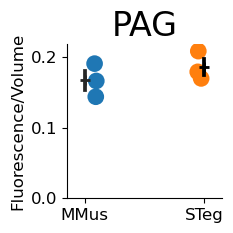

/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


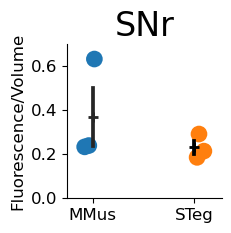

In [11]:
# calculate fluor/vol
omc_fluor = all_fluor[all_fluor["inj_site"]=="OMC"]
omc_fluor["Fluor/Vol"] = omc_fluor["Fluorescence"]/omc_fluor["Volume_mm3"]

dot_plot_by_species(omc_fluor, area="OMCc", title="OMCc", to_plot="Fluor/Vol", 
                    add_legend=False, ylabel="Fluorescence/Volume",
                    fig_size=(2,2))
plt.savefig(out_path+"fluor_vol_OMCc_dot.svg", dpi=300, bbox_inches="tight")
plt.show()

dot_plot_by_species(omc_fluor, area="aud", title="AUD/TEa", to_plot="Fluor/Vol", 
                    add_legend=False, ylabel="Fluorescence/Volume",
                    fig_size=(2,2))
plt.savefig(out_path+"fluor_vol_aud_dot.svg", dpi=300, bbox_inches="tight")
plt.show()

dot_plot_by_species(omc_fluor, area="PAG", title="PAG", to_plot="Fluor/Vol", 
                    add_legend=False, ylabel="Fluorescence/Volume",
                    fig_size=(2,2))
plt.savefig(out_path+"fluor_vol_PAG_dot.svg", dpi=300, bbox_inches="tight")
plt.show()

dot_plot_by_species(omc_fluor, area="SNr", title="SNr", to_plot="Fluor/Vol", 
                    add_legend=False, ylabel="Fluorescence/Volume",
                    fig_size=(2,2))
plt.savefig(out_path+"fluor_vol_SNr_dot.svg", dpi=300, bbox_inches="tight")
plt.show()

## ACA

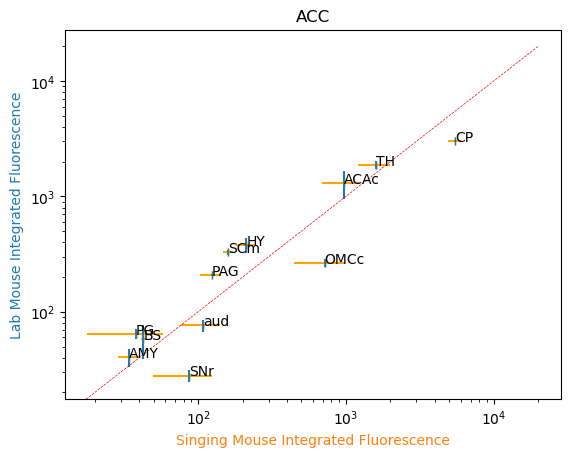

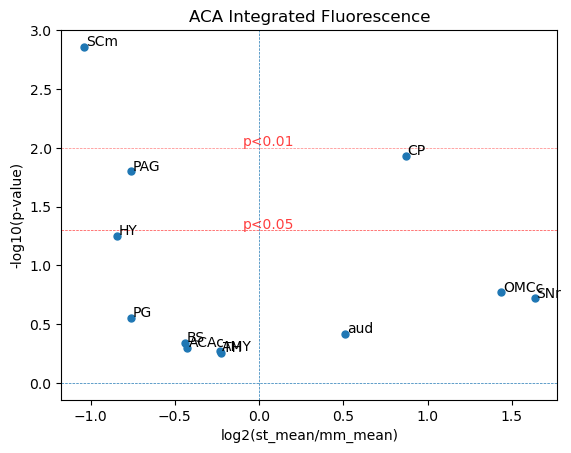

/tmp/ipykernel_2277506/391173142.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aca_fluor["Fluor/Vol"] = aca_fluor["Fluorescence"]/aca_fluor["Volume_mm3"]


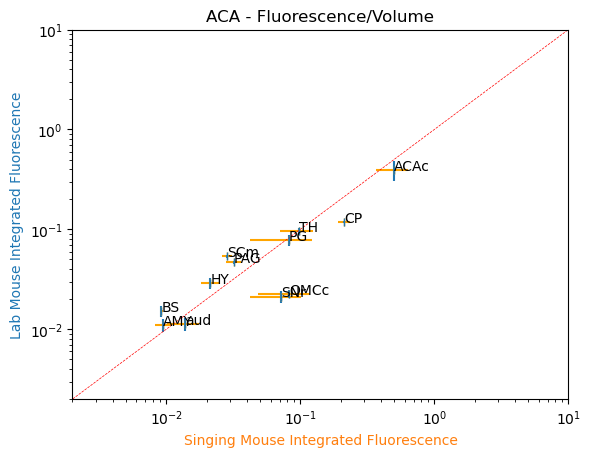

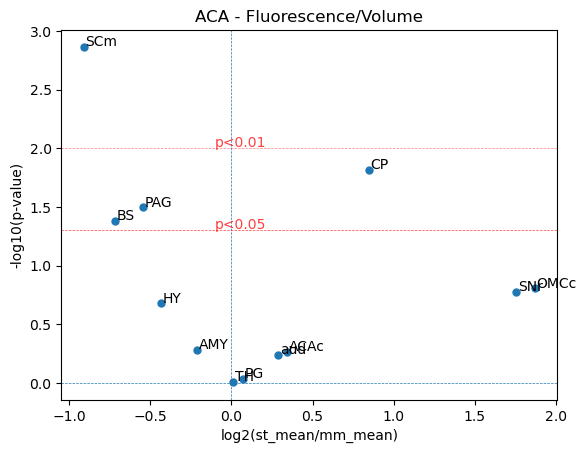

In [33]:
# scatterplot
aca_fluor = all_fluor[all_fluor["inj_site"]=="ACC"]

stvmm_area_scatter(aca_fluor, title="ACC")
plt.show()

#  Volcano plot
aca_ttest = df_ttest(aca_fluor)
volcano_plot(aca_ttest, title="ACA Integrated Fluorescence")
plt.show()

# flourescence/volume

# scatterplot
aca_fluor["Fluor/Vol"] = aca_fluor["Fluorescence"]/aca_fluor["Volume_mm3"]

stvmm_area_scatter(aca_fluor, title="ACA - Fluorescence/Volume", to_plot="Fluor/Vol",
                   ax_limits=(0.002, 10))
plt.show()

#  Volcano plot
aca_ttest = df_ttest(aca_fluor, test_vals="Fluor/Vol")
volcano_plot(aca_ttest, title="ACA - Fluorescence/Volume")
plt.show()

# OMC vs. ACA
- trying to make the point that method can determine differences

## STeg

In [56]:
all_fluor["Fluor/Vol"] = all_fluor['Fluorescence']/all_fluor['Volume_mm3']

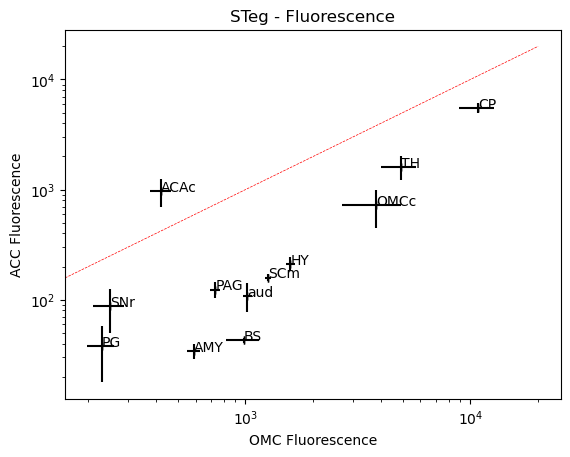

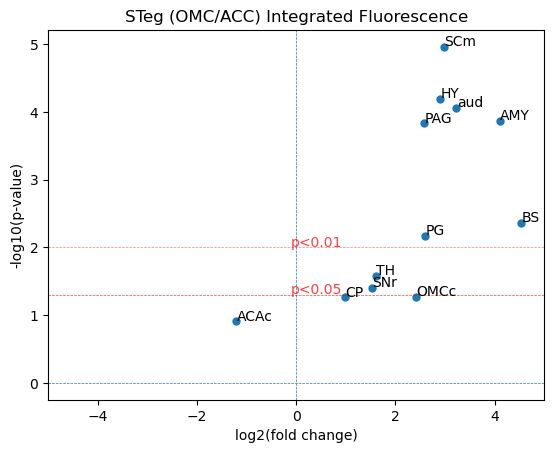

In [61]:
steg_fluor = all_fluor[all_fluor['species']=="STeg"]

area_scatter(steg_fluor, title="STeg - Fluorescence", compare_group="inj_site",
             xgroup="OMC", ygroup="ACC", to_plot="Fluorescence")
plt.show()


#  Volcano plot
st_ttest = df_ttest(steg_fluor, test_vals="Fluorescence",
                    compare_group="inj_site",
                    group1="OMC", group2="ACC")


volcano_plot(st_ttest, title="STeg (OMC/ACC) Integrated Fluorescence",
             xlim=(-5,5))
plt.show()

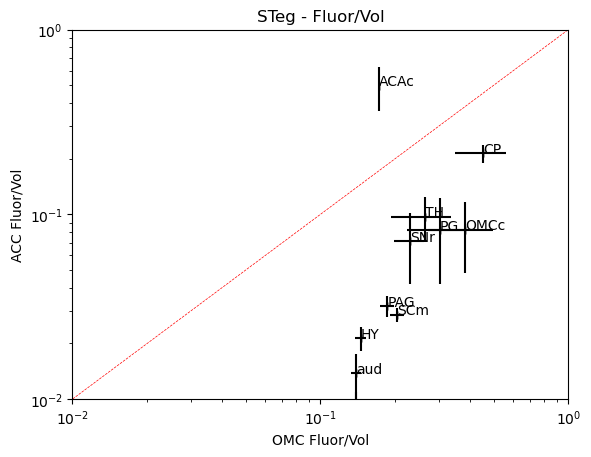

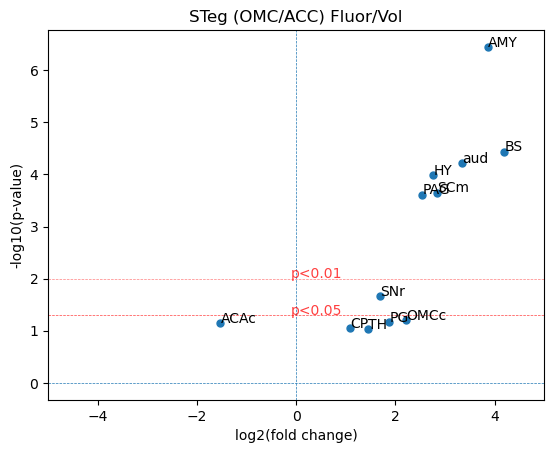

In [70]:
area_scatter(steg_fluor, title="STeg - Fluor/Vol", compare_group="inj_site",
             xgroup="OMC", ygroup="ACC", to_plot="Fluor/Vol", ax_limits=(0.01,1))
plt.show()


#  Volcano plot
st_ttest = df_ttest(steg_fluor, test_vals="Fluor/Vol",
                    compare_group="inj_site",
                    group1="OMC", group2="ACC")


volcano_plot(st_ttest, title="STeg (OMC/ACC) Fluor/Vol",
             xlim=(-5,5))
plt.show()

## MMus

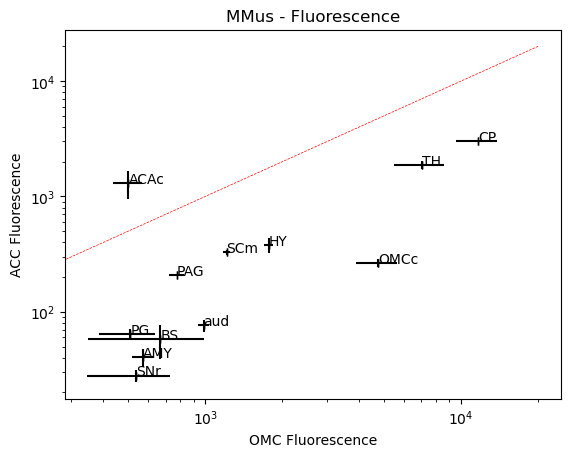

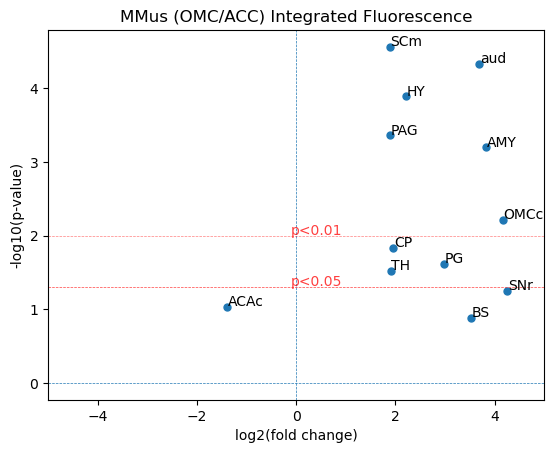

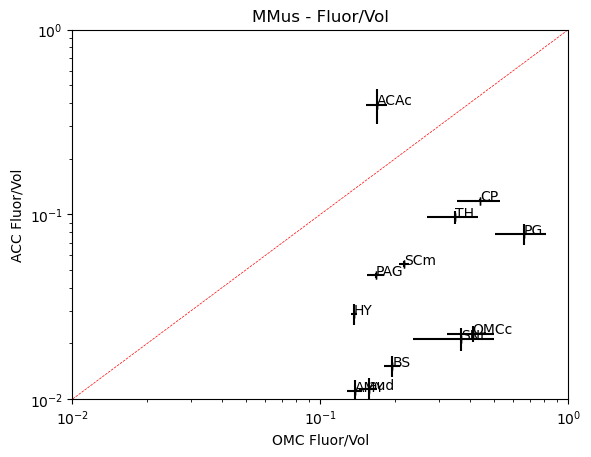

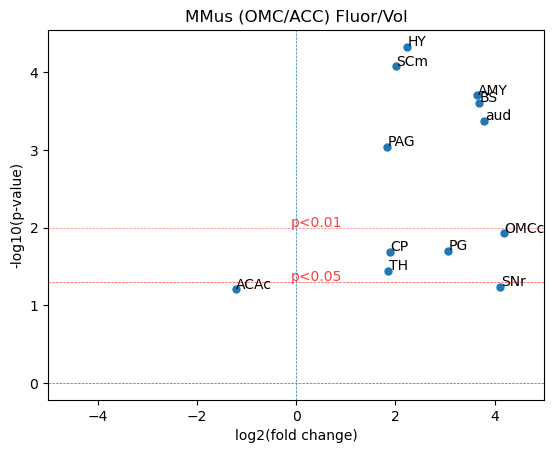

In [71]:
mmus_fluor = all_fluor[all_fluor['species']=="MMus"]

area_scatter(mmus_fluor, title="MMus - Fluorescence", compare_group="inj_site",
             xgroup="OMC", ygroup="ACC", to_plot="Fluorescence")
plt.show()


#  Volcano plot
mm_ttest = df_ttest(mmus_fluor, test_vals="Fluorescence",
                    compare_group="inj_site",
                    group1="OMC", group2="ACC")


volcano_plot(mm_ttest, title="MMus (OMC/ACC) Integrated Fluorescence",
             xlim=(-5,5))
plt.show()
area_scatter(mmus_fluor, title="MMus - Fluor/Vol", compare_group="inj_site",
             xgroup="OMC", ygroup="ACC", to_plot="Fluor/Vol", ax_limits=(0.01,1))
plt.show()


#  Volcano plot
mm_ttest = df_ttest(mmus_fluor, test_vals="Fluor/Vol",
                    compare_group="inj_site",
                    group1="OMC", group2="ACC")


volcano_plot(mm_ttest, title="MMus (OMC/ACC) Fluor/Vol",
             xlim=(-5,5))
plt.show()

# Inter vs. Intra species
- should see that b/w species (inter) diff are larger that within species (intra) diff

## OMC

/tmp/ipykernel_2277506/1846407086.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_means = result.groupby(['label', 'area']).mean().reset_index()


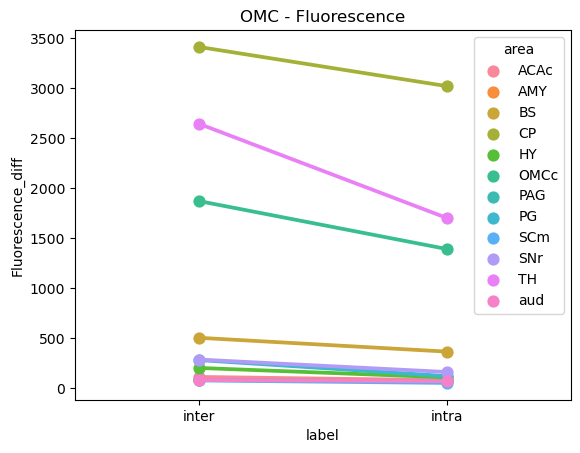

In [41]:
d1 = compare_groups(omc_fluor, group1="MMus", group2="STeg",
                    to_compare="Fluorescence", label="inter")
d2 = compare_groups(omc_fluor, group1="MMus", group2="MMus",
                    to_compare="Fluorescence", label="intra")
d3 = compare_groups(omc_fluor, group1="STeg", group2="STeg",
                    to_compare="Fluorescence", label="intra")

result = pd.concat([d1,d2,d3])

result_means = result.groupby(['label', 'area']).mean().reset_index()
result_means


sns.pointplot(result_means, x="label", y="Fluorescence_diff", hue="area")
plt.title("OMC - Fluorescence")
plt.show()


## ACA

/tmp/ipykernel_2277506/1914333998.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_means = result.groupby(['label', 'area']).mean().reset_index()


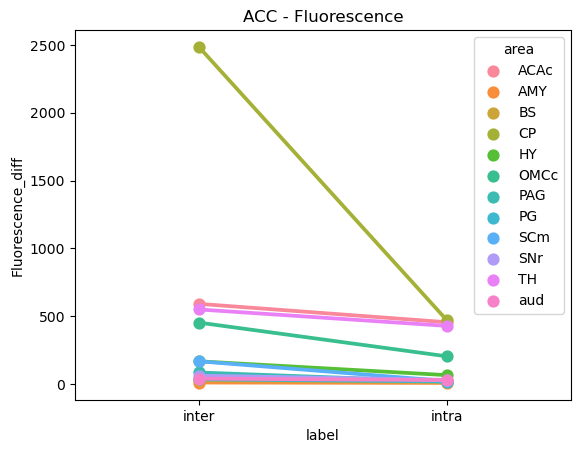

In [43]:
d1 = compare_groups(aca_fluor, group1="MMus", group2="STeg",
                    to_compare="Fluorescence", label="inter")
d2 = compare_groups(aca_fluor, group1="MMus", group2="MMus",
                    to_compare="Fluorescence", label="intra")
d3 = compare_groups(aca_fluor, group1="STeg", group2="STeg",
                    to_compare="Fluorescence", label="intra")

result = pd.concat([d1,d2,d3])

result_means = result.groupby(['label', 'area']).mean().reset_index()

sns.pointplot(result_means, x="label", y="Fluorescence_diff", hue="area")
plt.title("ACC - Fluorescence")
plt.show()


## Volume

/tmp/ipykernel_2277506/3688858162.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_means = result.groupby(['label', 'area']).mean().reset_index()


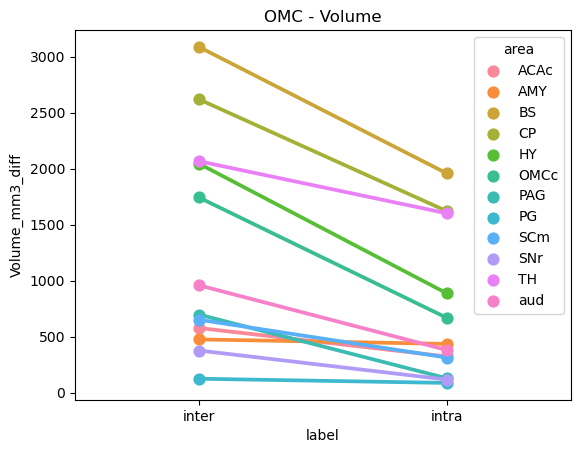

/tmp/ipykernel_2277506/3688858162.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_means = result.groupby(['label', 'area']).mean().reset_index()


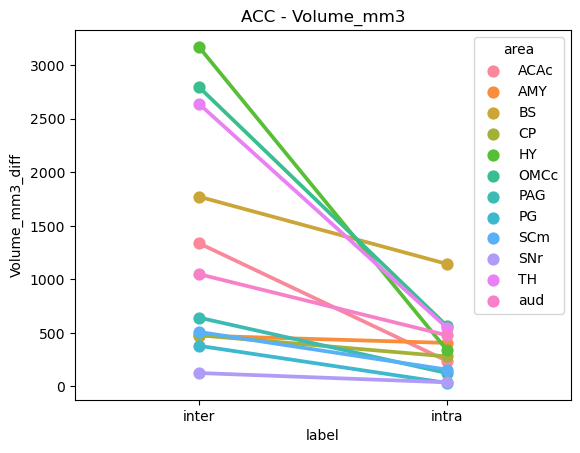

In [45]:
# volume
#OMC
d1 = compare_groups(omc_fluor, group1="MMus", group2="STeg",
                    to_compare="Volume_mm3", label="inter")
d2 = compare_groups(omc_fluor, group1="MMus", group2="MMus",
                    to_compare="Volume_mm3", label="intra")
d3 = compare_groups(omc_fluor, group1="STeg", group2="STeg",
                    to_compare="Volume_mm3", label="intra")

result = pd.concat([d1,d2,d3])

result_means = result.groupby(['label', 'area']).mean().reset_index()
result_means


sns.pointplot(result_means, x="label", y="Volume_mm3_diff", hue="area")
plt.title("OMC - Volume")
plt.show()

## ACA
d1 = compare_groups(aca_fluor, group1="MMus", group2="STeg",
                    to_compare="Volume_mm3", label="inter")
d2 = compare_groups(aca_fluor, group1="MMus", group2="MMus",
                    to_compare="Volume_mm3", label="intra")
d3 = compare_groups(aca_fluor, group1="STeg", group2="STeg",
                    to_compare="Volume_mm3", label="intra")

result = pd.concat([d1,d2,d3])

result_means = result.groupby(['label', 'area']).mean().reset_index()

sns.pointplot(result_means, x="label", y="Volume_mm3_diff", hue="area")
plt.title("ACC - Volume_mm3")
plt.show()


/tmp/ipykernel_2277506/762189182.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_means = result.groupby(['label', 'area']).mean().reset_index()


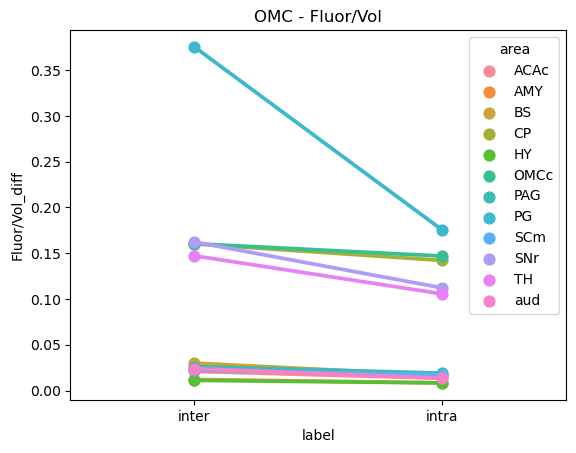

/tmp/ipykernel_2277506/762189182.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_means = result.groupby(['label', 'area']).mean().reset_index()


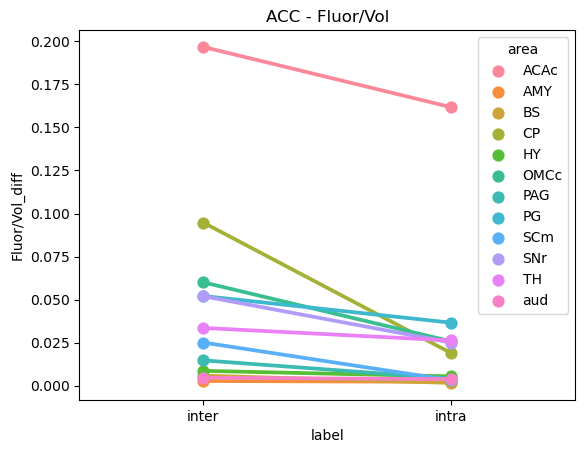

In [47]:
# volume
#OMC
d1 = compare_groups(omc_fluor, group1="MMus", group2="STeg",
                    to_compare="Fluor/Vol", label="inter")
d2 = compare_groups(omc_fluor, group1="MMus", group2="MMus",
                    to_compare="Fluor/Vol", label="intra")
d3 = compare_groups(omc_fluor, group1="STeg", group2="STeg",
                    to_compare="Fluor/Vol", label="intra")

result = pd.concat([d1,d2,d3])

result_means = result.groupby(['label', 'area']).mean().reset_index()
result_means


sns.pointplot(result_means, x="label", y="Fluor/Vol_diff", hue="area")
plt.title("OMC - Fluor/Vol")
plt.show()

## ACA
d1 = compare_groups(aca_fluor, group1="MMus", group2="STeg",
                    to_compare="Fluor/Vol", label="inter")
d2 = compare_groups(aca_fluor, group1="MMus", group2="MMus",
                    to_compare="Fluor/Vol", label="intra")
d3 = compare_groups(aca_fluor, group1="STeg", group2="STeg",
                    to_compare="Fluor/Vol", label="intra")

result = pd.concat([d1,d2,d3])

result_means = result.groupby(['label', 'area']).mean().reset_index()

sns.pointplot(result_means, x="label", y="Fluor/Vol_diff", hue="area")
plt.title("ACC - Fluor/Vol")
plt.show()
